## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_dummies = pd.get_dummies(df)
df_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [4]:
df_dummies.corr()["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [5]:
X = df_dummies.copy().drop(columns="median_house_value")
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False


In [6]:
y = df_dummies.copy()["median_house_value"]
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
arvore_8 = DecisionTreeRegressor( max_depth=8) 
arvore_2 = DecisionTreeRegressor( max_depth=2) 

In [9]:
arvore_8.fit(X_train,y_train)
arvore_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [10]:
score_2= arvore_2.score(X_train, y_train ) 
score_8= arvore_8.score(X_train, y_train ) 

In [11]:
print(score_2)
print(score_8)

0.49621622843726276
0.7704589508497737


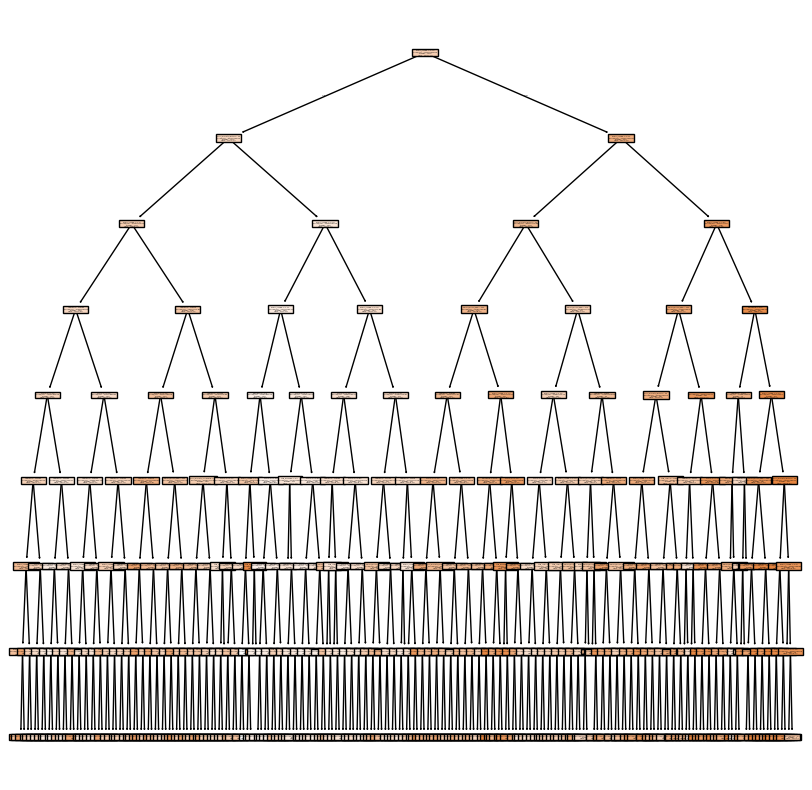

In [12]:
plt.rc('figure', figsize=(10,10))
tp = tree.plot_tree(arvore_8, feature_names = X.columns, filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [13]:
path = arvore_8.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.24160207e+03, 3.10206718e+03, 4.10077519e+03,
        5.04764215e+03, 5.84276486e+03, 9.89179587e+03, 5.61656977e+04,
        7.19586563e+04, 8.07525840e+04, 1.27520995e+05, 2.51815073e+05,
        2.67078488e+05, 2.83256245e+05, 3.20344059e+05, 3.62051163e+05,
        3.66547654e+05, 3.83768735e+05, 4.28497337e+05, 4.46579828e+05,
        4.95142146e+05, 5.38426941e+05, 5.41684017e+05, 5.41983651e+05,
        5.86013028e+05, 6.20817642e+05, 6.26632655e+05, 6.52410949e+05,
        6.59598346e+05, 6.62794508e+05, 6.65059771e+05, 6.98645327e+05,
        7.08358946e+05, 7.29129220e+05, 7.32870709e+05, 7.33891533e+05,
        7.52515196e+05, 7.98850087e+05, 8.12662011e+05, 8.25135980e+05,
        8.46488376e+05, 9.39884758e+05, 9.58630727e+05, 9.80965417e+05,
        1.01257370e+06, 1.01504339e+06, 1.07785353e+06, 1.09425210e+06,
        1.09478151e+06, 1.11436222e+06, 1.17436432e+06, 1.17925872e+06,
        1.22025534e+06, 1.28692380e+06, 1.31520927

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [14]:
ccp_alpha= path.ccp_alphas
impurities = path.impurities

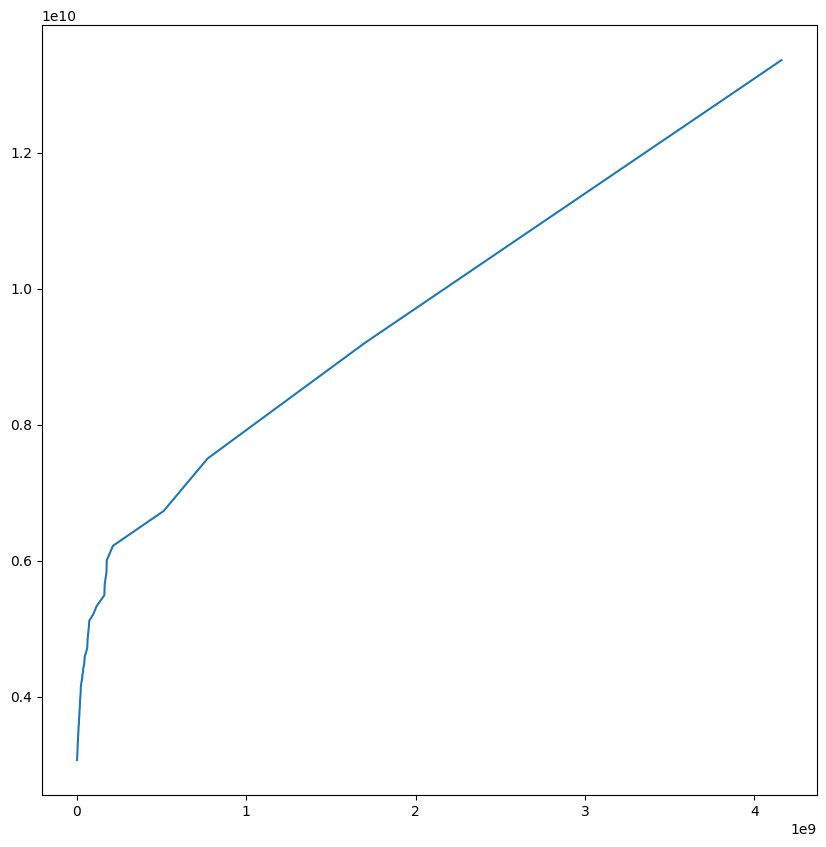

In [15]:
plt.plot(ccp_alpha,impurities)

In [16]:
clfs = []
for alpha in ccp_alpha:
    clf = DecisionTreeRegressor(ccp_alpha=alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [17]:
train_scores = [metrics.mean_squared_error(y_train,clf.predict(X_train)) for clf in clfs]
test_scores = [metrics.mean_squared_error(y_test,clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

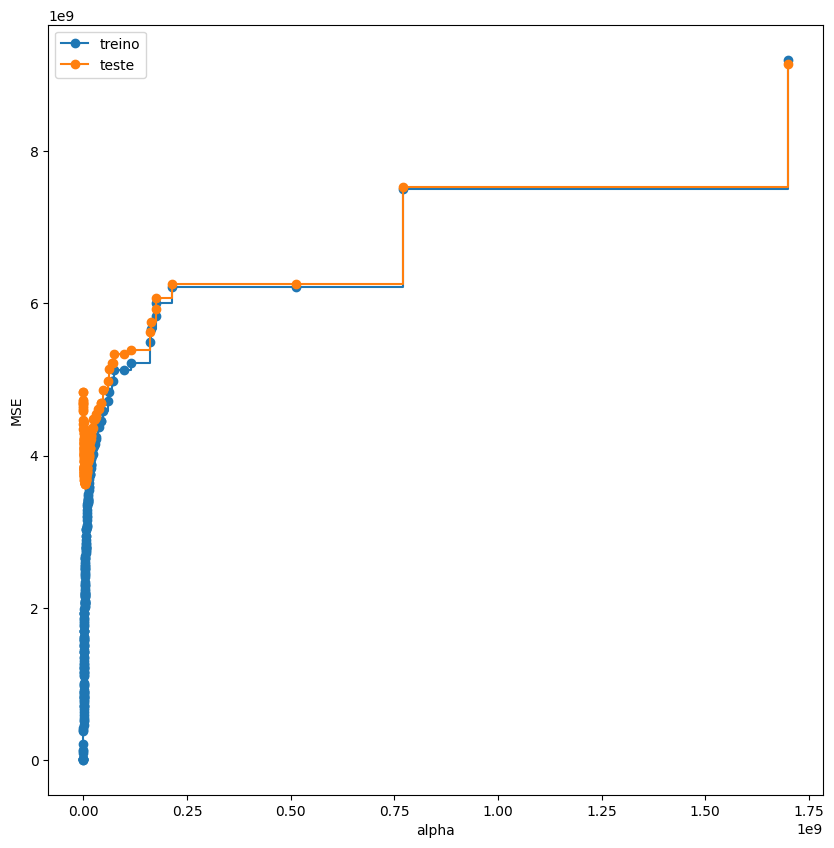

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.plot(ccp_alpha[:-1],train_scores[:-1],label = "treino",marker='o',drawstyle="steps-post")
ax.plot(ccp_alpha[:-1],test_scores[:-1],label = "teste",marker='o',drawstyle="steps-post")
ax.legend()
plt.show()

Escolhido alpha do valor 0

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [19]:
arvore_final = DecisionTreeRegressor(ccp_alpha=0)
arvore_final.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0)

### 7. Visualize esta árvore.

In [21]:
plt.rc('figure', figsize=(10,10))
tp2 = tree.plot_tree(arvore_final, feature_names = X.columns, filled=True)

Error in callback <function flush_figures at 0x000002A6ADBB2560> (for post_execute):


KeyboardInterrupt: 